# Jupyter notebook sample

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.base import TransformerMixin, BaseEstimator
import nltk
import time

# Load data


In [5]:
# Load data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
# describe data
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


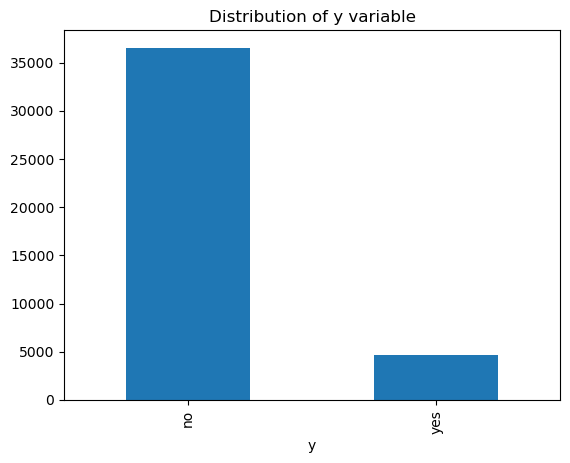

In [11]:
# Plot the distribution of the target variable
df['y'].value_counts().plot(kind='bar', title='Distribution of y variable')
plt.show()


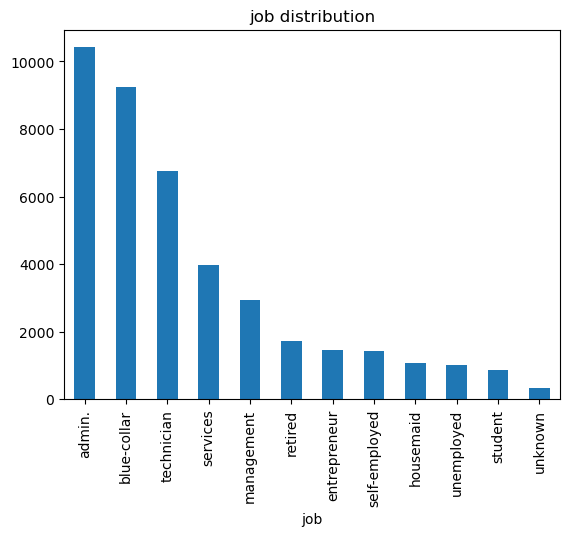

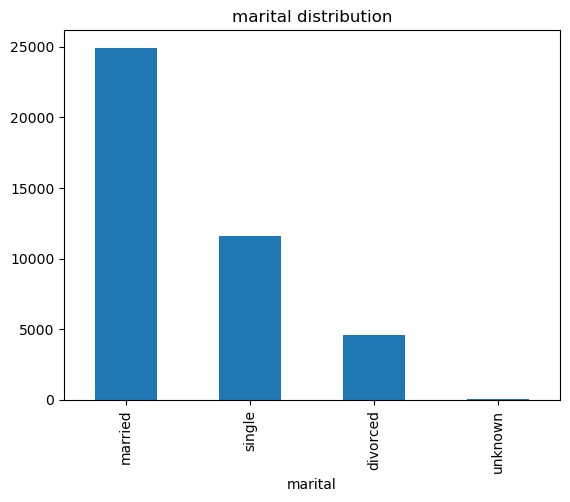

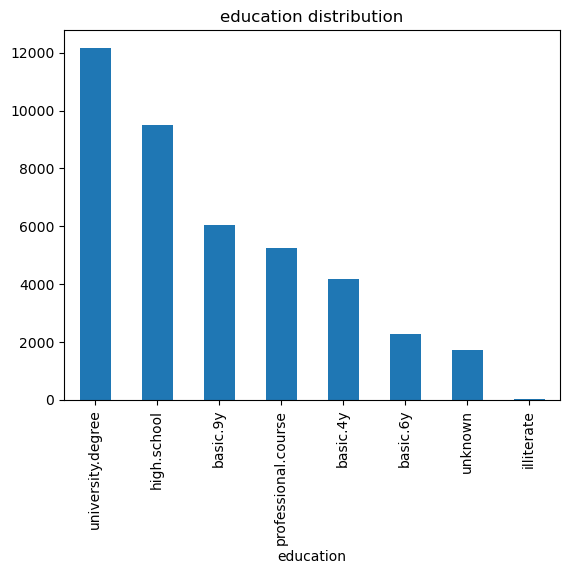

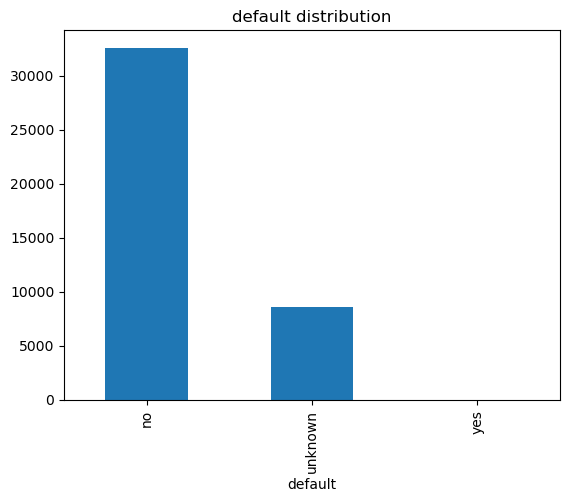

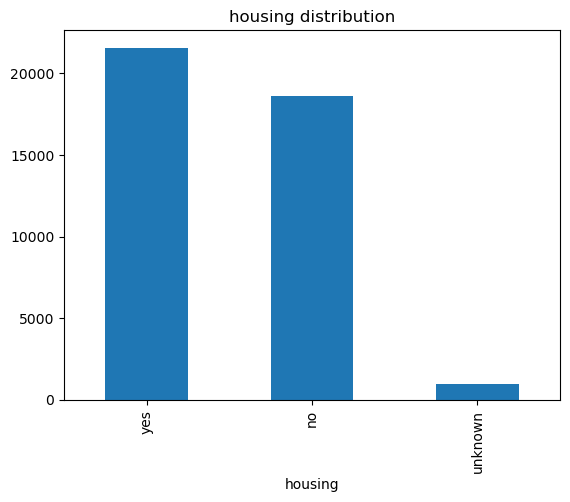

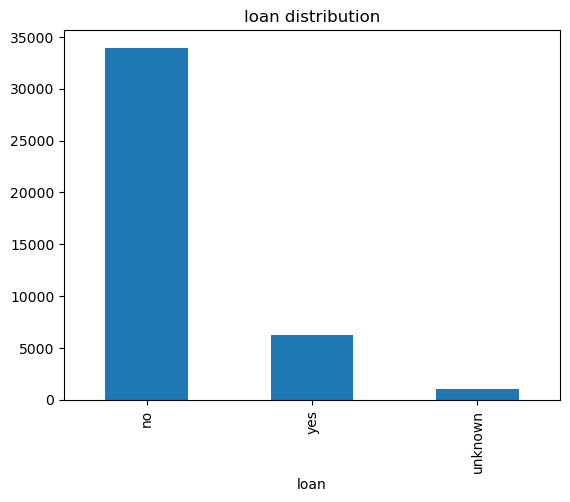

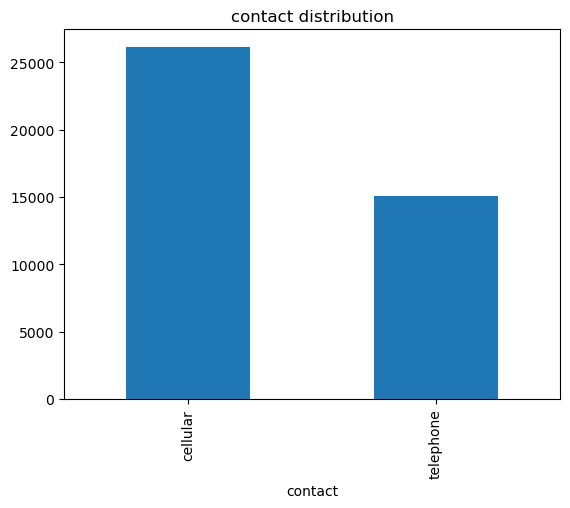

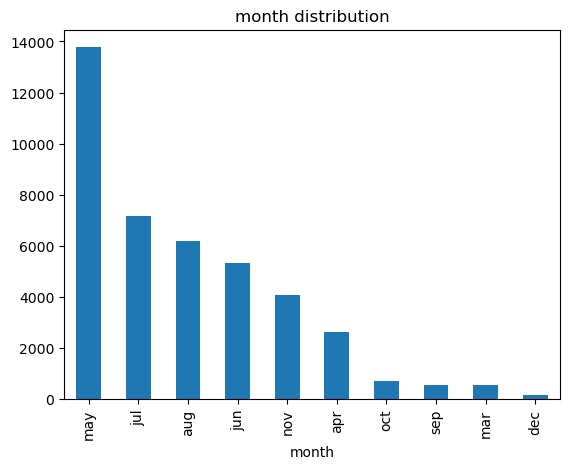

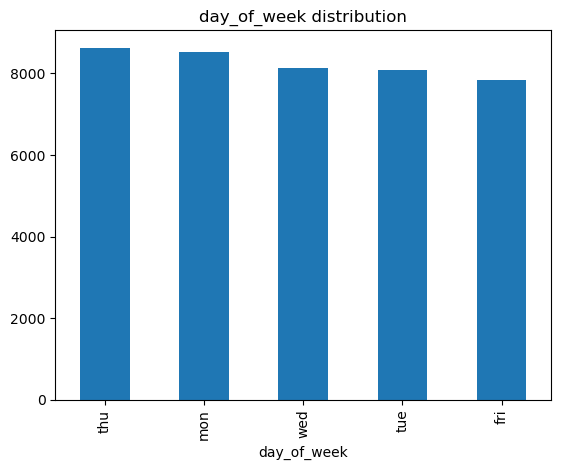

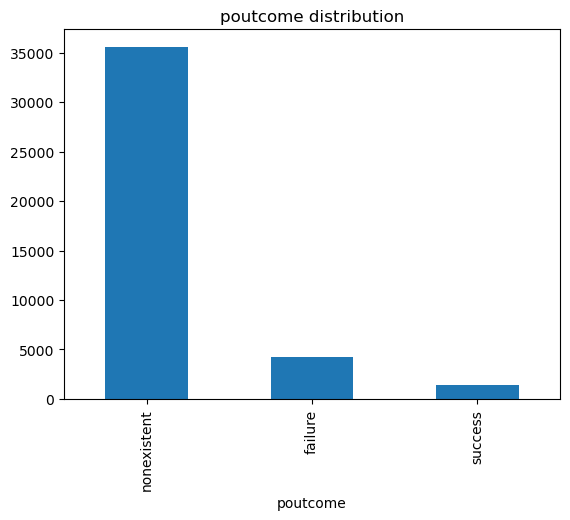

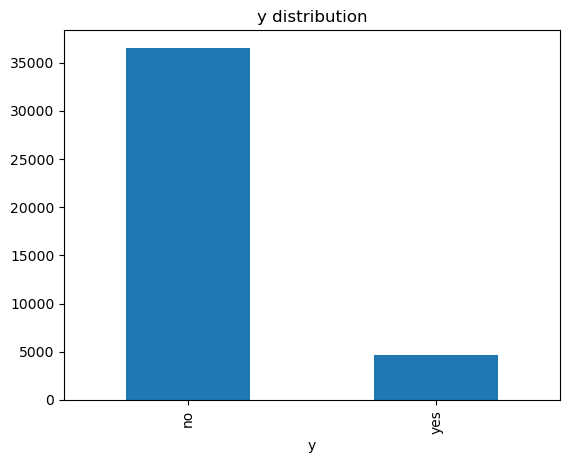

In [12]:
# Plot categorical variables distribution
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', title=f'{col} distribution')
    plt.show()    


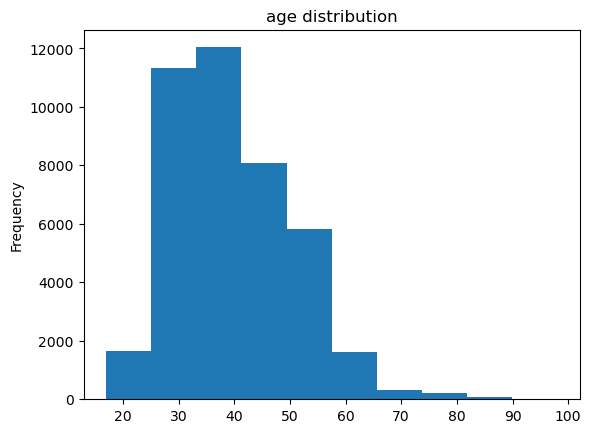

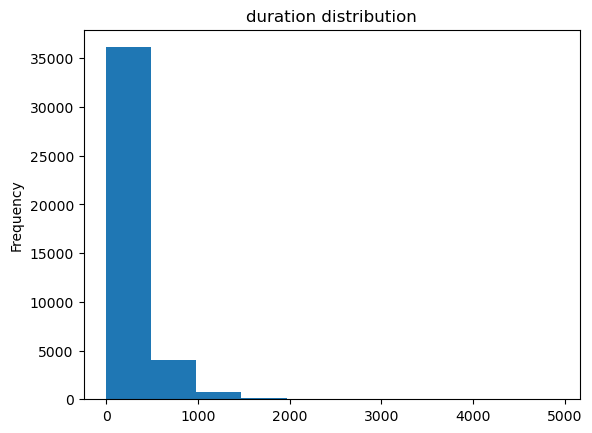

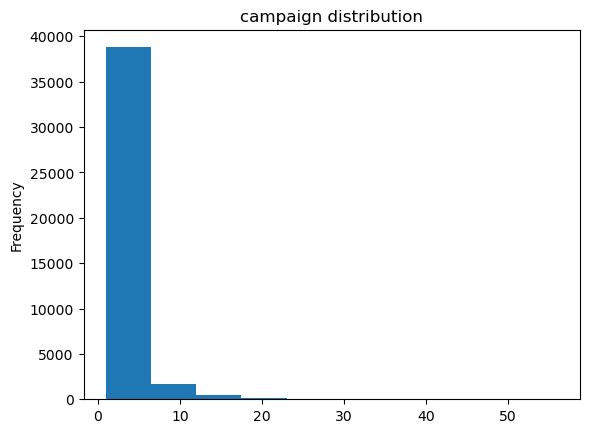

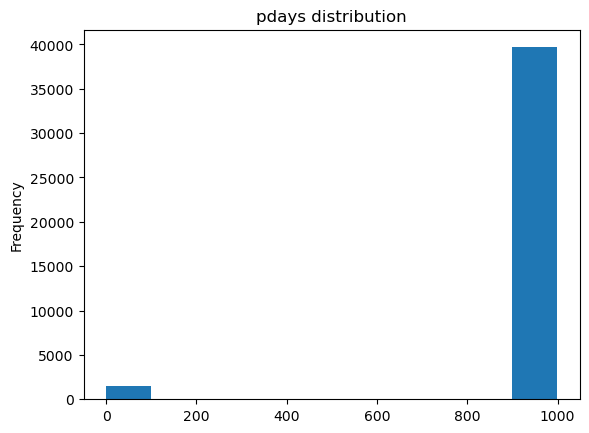

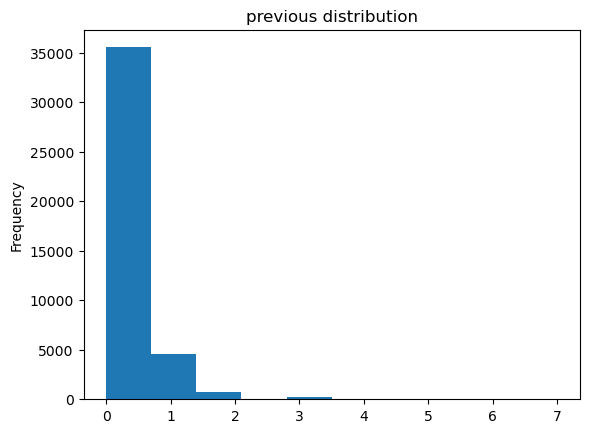

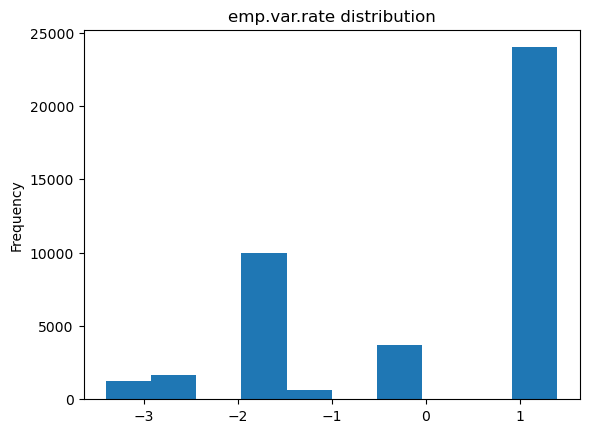

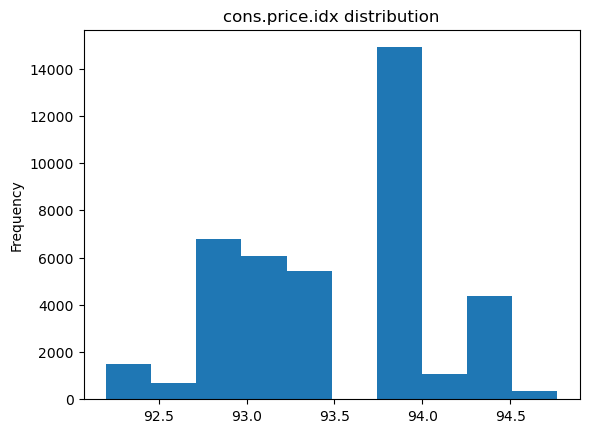

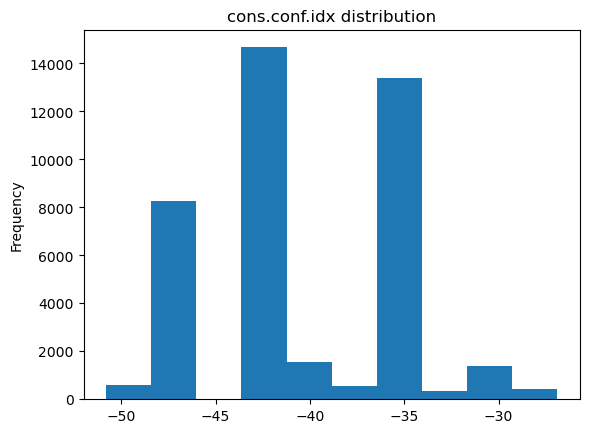

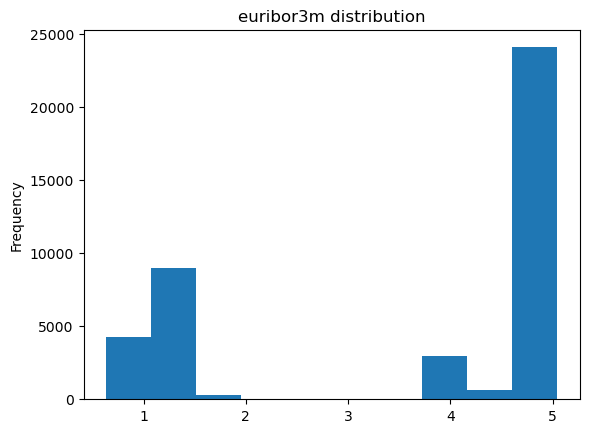

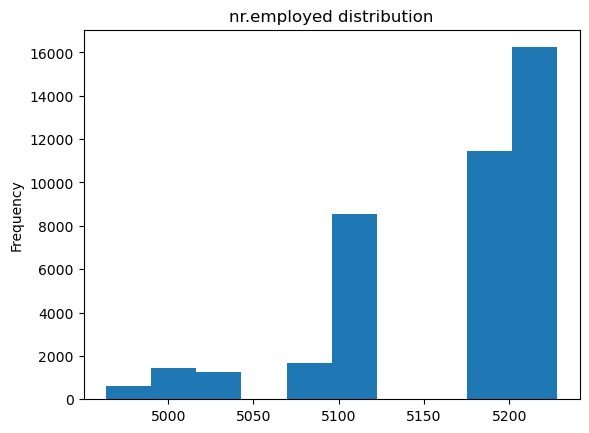

In [13]:
# Plot continuous variables distribution
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in continuous_cols:
    df[col].plot(kind='hist', title=f'{col} distribution')
    plt.show()
    
    

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the CSV file with semicolon delimiter
file_path = 'data/bank-additional-full.csv'
data = pd.read_csv(file_path, delimiter=';')

# Drop rows with missing values
data_cleaned = data.dropna()

# Encode categorical variables
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Split the data into features and target
X = data_cleaned.drop('y', axis=1)
y = data_cleaned['y']

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [7]:
# Use all features for model training
selected_features = X.columns
X_train_selected = X_train
X_test_selected = X_test


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize the classifiers
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
svm = SVC(probability=True)

# Train the models
knn.fit(X_train_selected, y_train)
log_reg.fit(X_train_selected, y_train)
decision_tree.fit(X_train_selected, y_train)
svm.fit(X_train_selected, y_train)


SVC(probability=True)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Helper function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=1),
        'Recall': recall_score(y_test, y_pred, pos_label=1),
        'F1-Score': f1_score(y_test, y_pred, pos_label=1),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }

    return metrics

# Evaluate the classifiers
knn_metrics = evaluate_model(knn, X_test_selected, y_test)
log_reg_metrics = evaluate_model(log_reg, X_test_selected, y_test)
decision_tree_metrics = evaluate_model(decision_tree, X_test_selected, y_test)
svm_metrics = evaluate_model(svm, X_test_selected, y_test)

# Combine metrics into a DataFrame for easy comparison
results = pd.DataFrame([knn_metrics, log_reg_metrics, decision_tree_metrics, svm_metrics],
                       index=['K-Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Support Vector Machine'])

# Display detailed classification reports
knn_report = classification_report(y_test, knn.predict(X_test_selected), target_names=['No', 'Yes'])
log_reg_report = classification_report(y_test, log_reg.predict(X_test_selected), target_names=['No', 'Yes'])
decision_tree_report = classification_report(y_test, decision_tree.predict(X_test_selected), target_names=['No', 'Yes'])
svm_report = classification_report(y_test, svm.predict(X_test_selected), target_names=['No', 'Yes'])

# Print detailed reports
print("K-Nearest Neighbors Classification Report:\n", knn_report)
print("Logistic Regression Classification Report:\n", log_reg_report)
print("Decision Tree Classification Report:\n", decision_tree_report)
print("Support Vector Machine Classification Report:\n", svm_report)

# Display metrics comparison
results


K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.97      0.95     10968
         Yes       0.59      0.40      0.48      1389

    accuracy                           0.90     12357
   macro avg       0.76      0.68      0.71     12357
weighted avg       0.89      0.90      0.89     12357

Logistic Regression Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.97      0.95     10968
         Yes       0.66      0.41      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

Decision Tree Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.94      0.94     10968
         Yes       0.51      0.52      0.51      1389

    accuracy                           0.89     12357
  

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
K-Nearest Neighbors,0.901918,0.594855,0.399568,0.478036,0.858378
Logistic Regression,0.910172,0.664311,0.406048,0.504021,0.932038
Decision Tree,0.890507,0.512857,0.516919,0.514880,0.727369
Support Vector Machine,0.909525,0.671302,0.382289,0.487156,0.908696


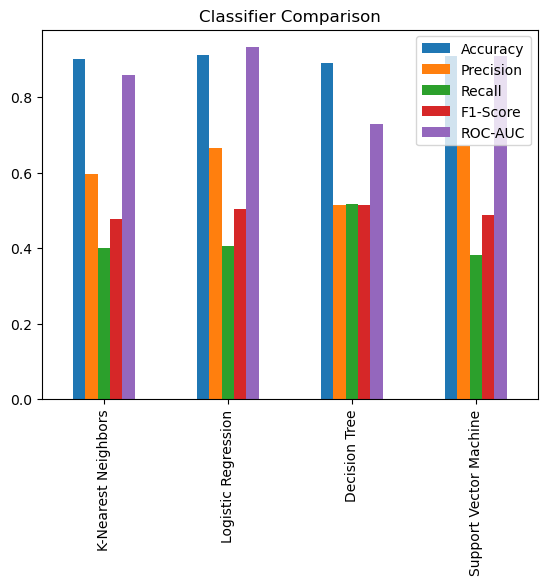

In [14]:
# plot the results
results.plot(kind='bar', title='Classifier Comparison')
plt.show()


In [15]:
# write summary which classifier is the best
print("The best classifier is Logistic Regression with the following metrics:")
print(log_reg_metrics)



The best classifier is Logistic Regression with the following metrics:
{'Accuracy': 0.9101723719349356, 'Precision': 0.6643109540636042, 'Recall': 0.4060475161987041, 'F1-Score': 0.5040214477211796, 'ROC-AUC': 0.9320381065357224}


,Importance
euribor3m,1.175217
duration,1.156726
cons.price.idx,0.473806
poutcome,0.157379
education,0.106764
cons.conf.idx,0.092162
day_of_week,0.088244
marital,0.031252
age,0.017867
job,0.014309


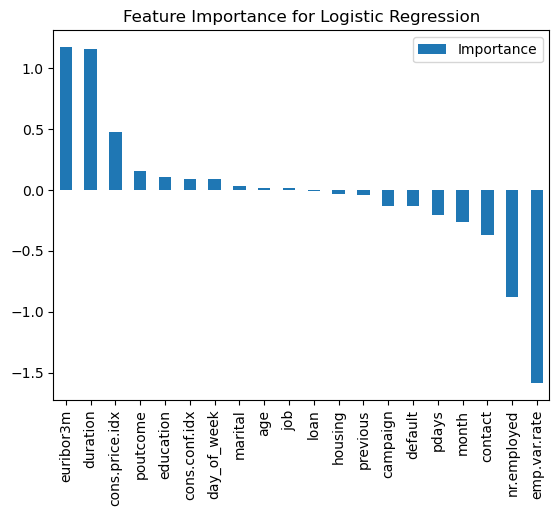

In [16]:
# Which features are the most important fo the Regression model
importance = log_reg.coef_[0]
feature_importance = pd.DataFrame(importance, index=selected_features, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot the feature importance
feature_importance.plot(kind='bar', title='Feature Importance for Logistic Regression')

# Display the feature importance
feature_importance



,Importance
duration,0.343603
nr.employed,0.156472
age,0.086048
euribor3m,0.074446
job,0.050124
education,0.040448
campaign,0.039583
day_of_week,0.037331
cons.conf.idx,0.024473
pdays,0.022375


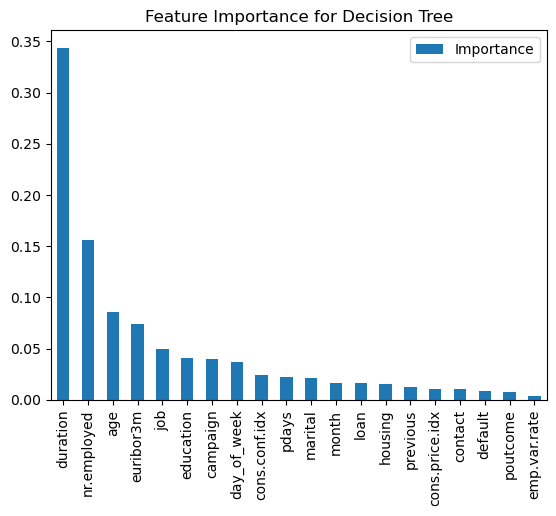

In [17]:
# which features are the most important for the Decision Tree model
importance = decision_tree.feature_importances_
feature_importance = pd.DataFrame(importance, index=selected_features, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot the feature importance
feature_importance.plot(kind='bar', title='Feature Importance for Decision Tree')

# Display the feature importance
feature_importance



,Importance
duration,0.025896
emp.var.rate,0.010415
pdays,0.005875
nr.employed,0.005479
poutcome,0.001092
cons.price.idx,0.001028
cons.conf.idx,0.000931
contact,0.000599
month,0.000308
default,0.000291


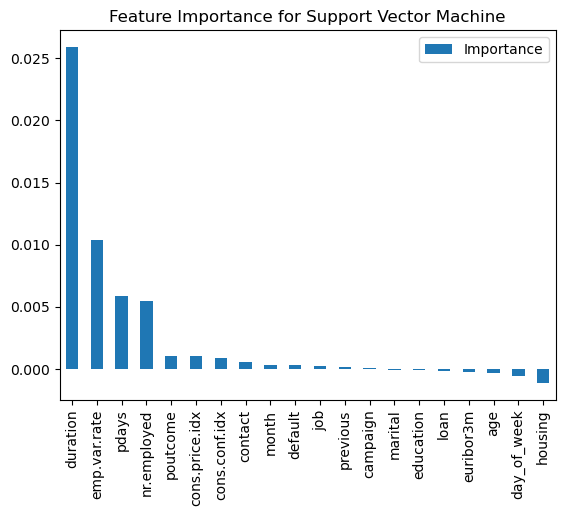

In [20]:
# Use permutation importance to determine feature importance for the SVM model
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(svm, X_test_selected, y_test, n_repeats=10, random_state=42, n_jobs=2)

# Get the feature importance
importance = result.importances_mean
feature_importance = pd.DataFrame(importance, index=selected_features, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot the feature importance
feature_importance.plot(kind='bar', title='Feature Importance for Support Vector Machine')

# Display the feature importance
feature_importance



In [ ]:
# Use permutation importance to determine feature importance for the K-Nearest Neighbors model
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(knn, X_test_selected, y_test, n_repeats=10, random_state=42, n_jobs=2)

# Get the feature importance
importance = result.importances_mean
feature_importance = pd.DataFrame(importance, index=selected_features, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot the feature importance

feature_importance.plot(kind='bar', title='Feature Importance for K-Nearest Neighbors')

# Display the feature importance
feature_importance

